In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


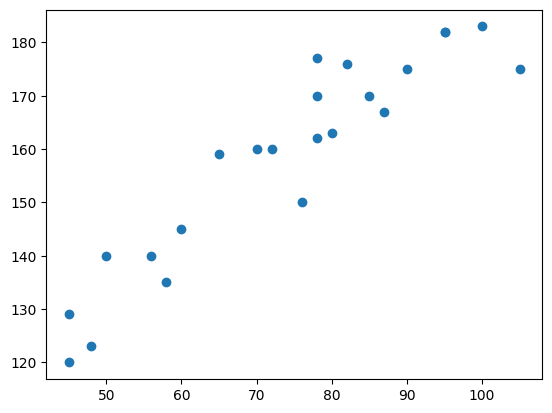

In [4]:
plt.scatter(df['Weight'],df['Height'])

In [5]:
## Dividing the dataset into independent and dependent features
X=df[['Weight']] ## Independent Feature
y=df['Height'] ## Dependent Feature

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
## Standardize the train independent feature
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

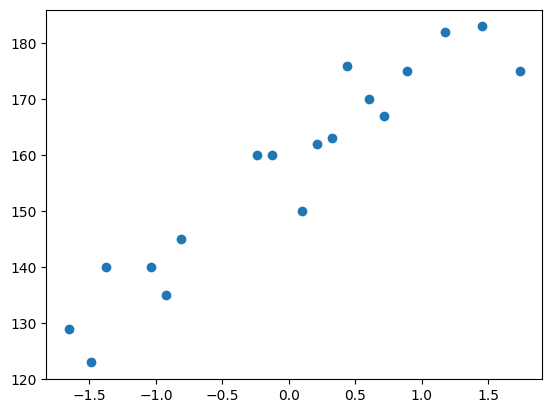

In [11]:
plt.scatter(X_train,y_train)

In [12]:
## Training the simple linear regression model
from sklearn.linear_model import LinearRegression

In [13]:
regression=LinearRegression()

In [14]:
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
print("The slope or coefficient of weight is",regression.coef_)
print("The Intercept is",regression.intercept_)

The slope or coefficient of weight is [17.03440872]
The Intercept is 157.5


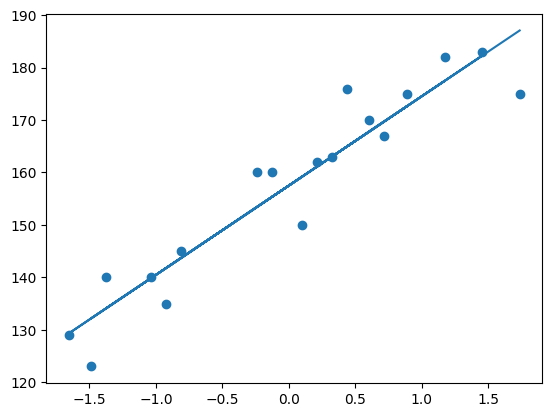

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [17]:
y_pred_test=regression.predict(X_test)

In [18]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

In [19]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
mse=mean_squared_error(y_pred_test,y_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [21]:
mse,mae,rmse

(109.77592599051664, 9.822657814519232, np.float64(10.477400726827081))

In [22]:
from sklearn.metrics import r2_score

In [23]:
score=r2_score(y_test,y_pred_test)

In [24]:
score

0.776986986042344

In [25]:
## Testing new data weight is 80kg
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\furkh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [26]:
print("The predicted height is",regression.predict([scaled_weight[0]]))

The predicted height is [163.01076266]


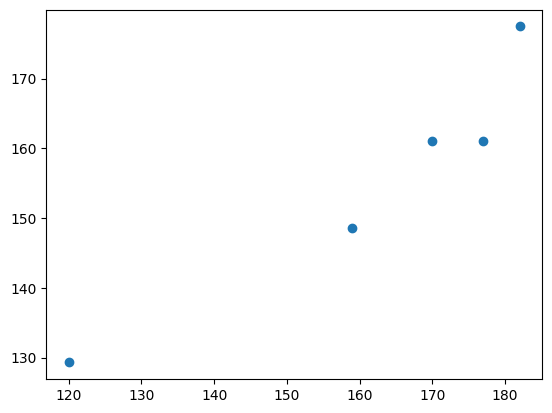

In [27]:
## Assumptions 
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)
## If the scatter plot is uniformly distributed then prediction is good

In [28]:
## Residuals    
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

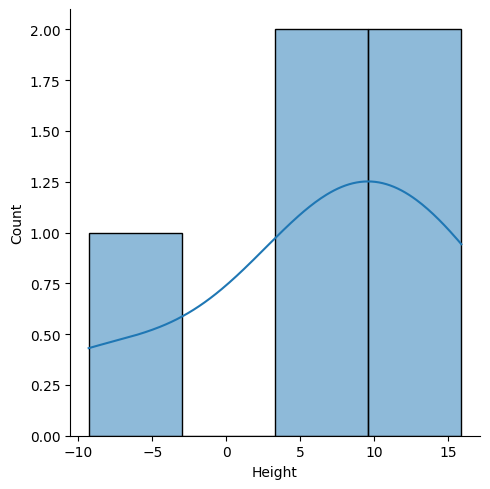

In [29]:
## Plotting the residuals
sns.displot(residuals,kde=True)